# Bank Churn Analysis with Logistic Regression
Hello! Welcome to the notebook!

This notebook will serve as the step by step code explanation on how I analyse the Bank Customer Churn dataset. The decision made based from the result will be summarized using Tableau Dashboard and a quick power point presentation. Please do let me know if you have any suggestions for the methods i'm using in this notebook!

NOTE: This is not a final, Update and changes are still going on for this project.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy as sp
import warnings
import string
import datetime
warnings.filterwarnings("ignore")
%matplotlib inline

# Dataset Unloading

In [3]:
data = pd.read_csv('/content/Churn Modeling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [9]:
data.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [10]:
data.mean()

RowNumber          5.000500e+03
CustomerId         1.569094e+07
CreditScore        6.505288e+02
Age                3.892180e+01
Tenure             5.012800e+00
Balance            7.648589e+04
NumOfProducts      1.530200e+00
HasCrCard          7.055000e-01
IsActiveMember     5.151000e-01
EstimatedSalary    1.000902e+05
Exited             2.037000e-01
dtype: float64

In [11]:
data.value_counts()

RowNumber  CustomerId  Surname     CreditScore  Geography  Gender  Age  Tenure  Balance    NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited
1          15634602    Hargrave    619          France     Female  42   2       0.00       1              1          1               101348.88        1         1
6671       15667932    Bellucci    758          Spain      Female  43   10      0.00       2              1          1               55313.44         0         1
6664       15766185    She         850          Germany    Male    31   4       146587.30  1              1          1               89874.82         0         1
6665       15667632    Birdseye    703          France     Female  42   7       0.00       2              0          1               72500.68         0         1
6666       15599024    Hope        506          Spain      Male    32   8       0.00       2              0          1               182692.80        0         1
                                 

In [12]:
## Checking Null Values

In [13]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [14]:
data.isnull().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [15]:
data.shape

(10000, 14)

# Exploratory Data Analysis
EDA is meant to understand dataset deeper. Start from distrubution, frequency, and Correlation to process dataset subsequently in appropiate settings.

In [16]:
data.corr()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


## Heatmap 
function is to set a graphical representation of variables correlation that uses a system of color-coding to represent different values.

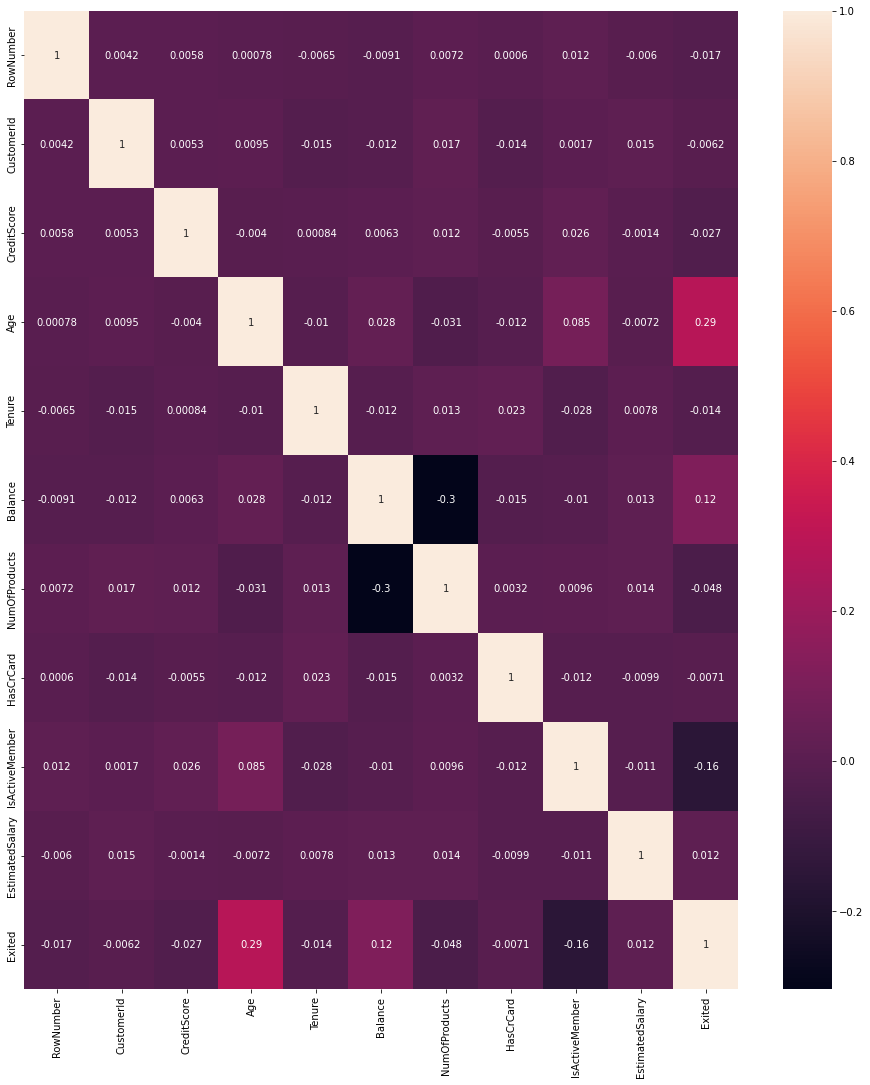

In [18]:
plt.figure(figsize = (16,18))
sns.heatmap(data.corr(), annot = True)

### Histogram
To Represent data provided in a form of some groups, and to show numerical data distribution.

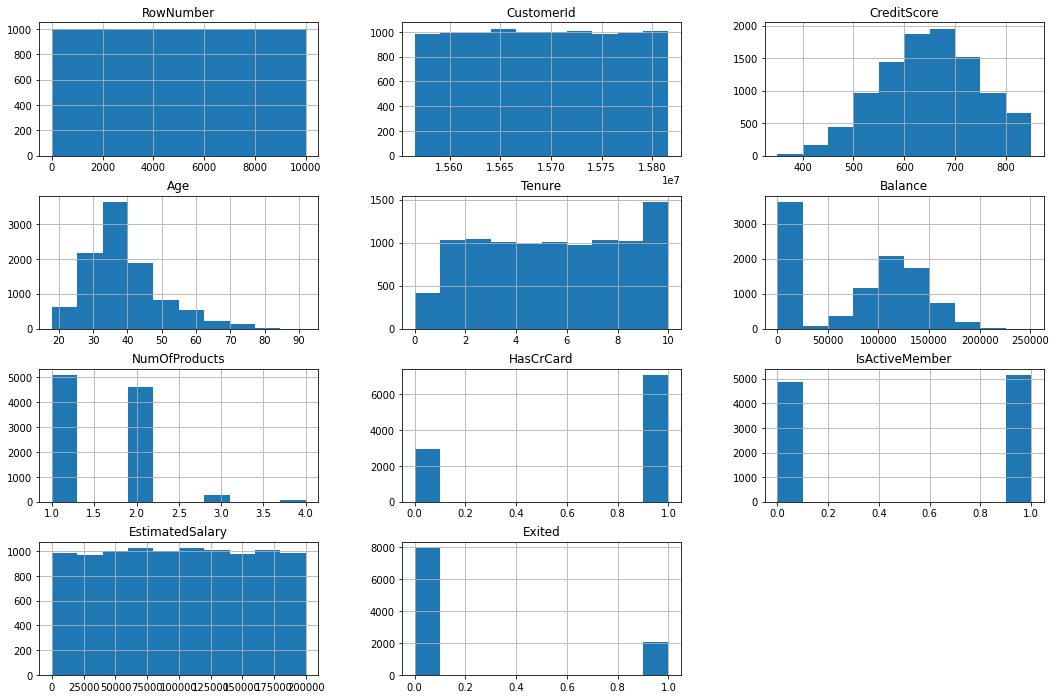

In [19]:
data.hist(figsize=(18,12))
plt.show()

### Scatter Plot
To Represents values for two different numeric variables using dots

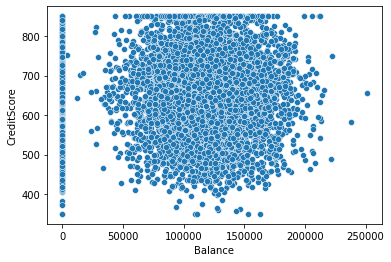

In [20]:
sns.scatterplot(x='Balance', y= 'CreditScore', data=data)

### Pairplot
To show realations ship between two variables in a dataset.

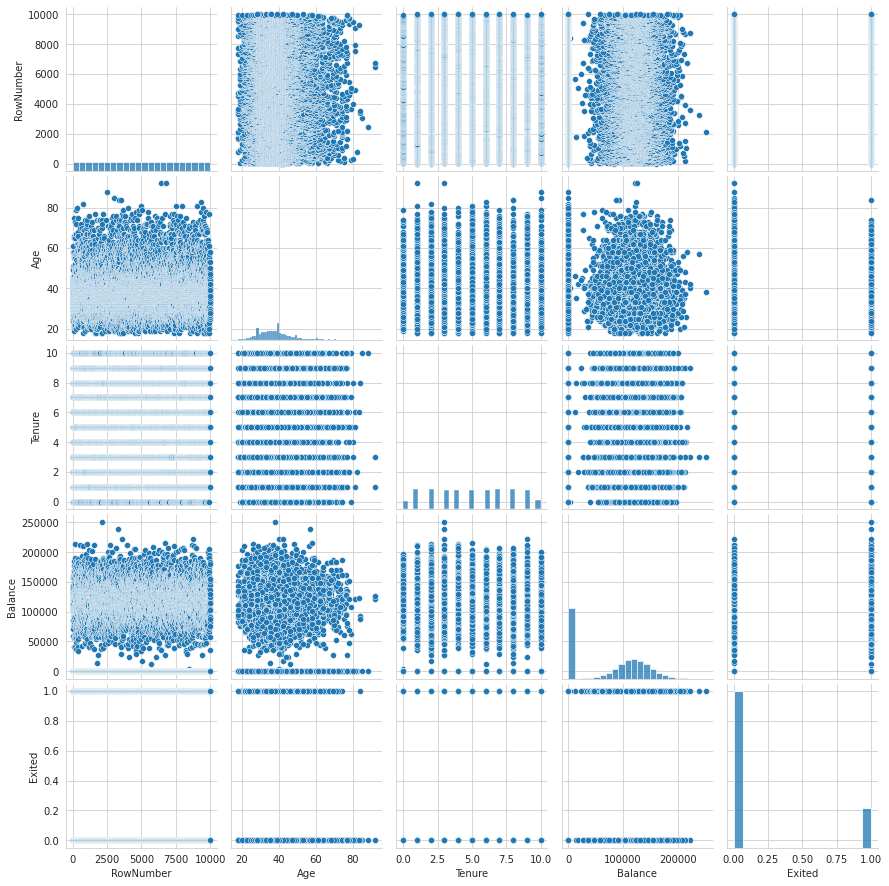

In [22]:
sns.set_style("whitegrid") 
mean_col = ['RowNumber','Gender','Age','Tenure','Balance','Exited']
sns.pairplot(data[mean_col],palette='Accent')

### Relplot
To Show Statistical Relationships using two common approaches: Scatter plots and line plots

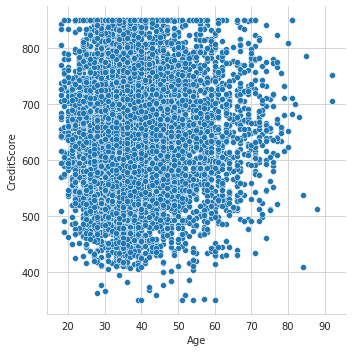

In [23]:
sns.relplot(x='Age', y= 'CreditScore', data=data)

### Jointplot
To Show realtionship between 2 variables as well as 1 variables in the margins.

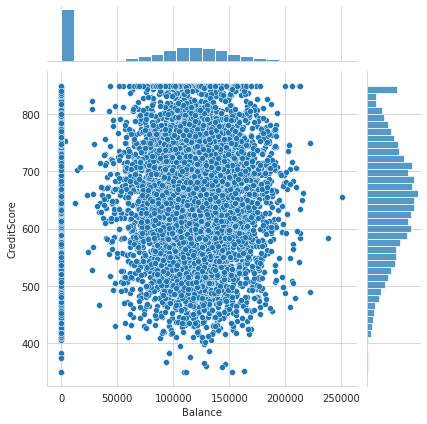

In [24]:
sns.jointplot(x='Balance', y= 'CreditScore', data=data)

### KDE Plot
To visualize the probability density of a continuous variables. It depicts the probability density at different values in a continous variable

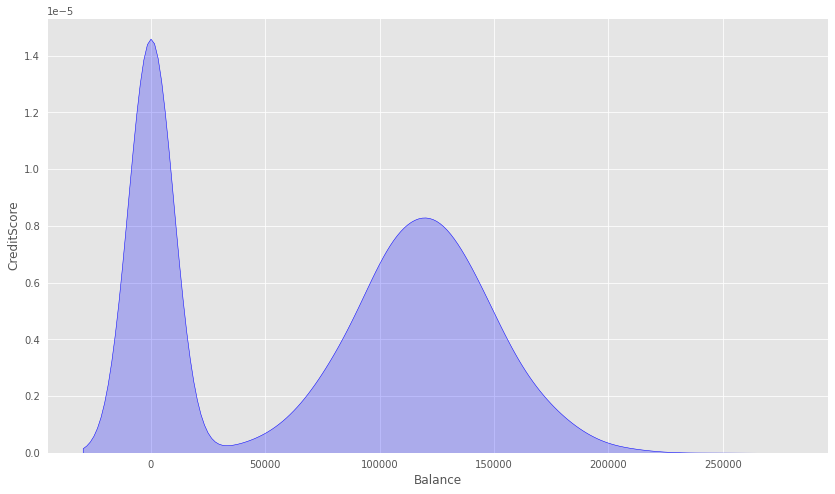

In [25]:
plt.style.use("ggplot")
plt.figure(figsize=(14,8))
plt.xlabel('Balance')
plt.ylabel('CreditScore')
sns.kdeplot(data['Balance'],shade=True,color='blue')
plt.show()

### Barplot
It Shows relationship between a numeric and a categoric variables

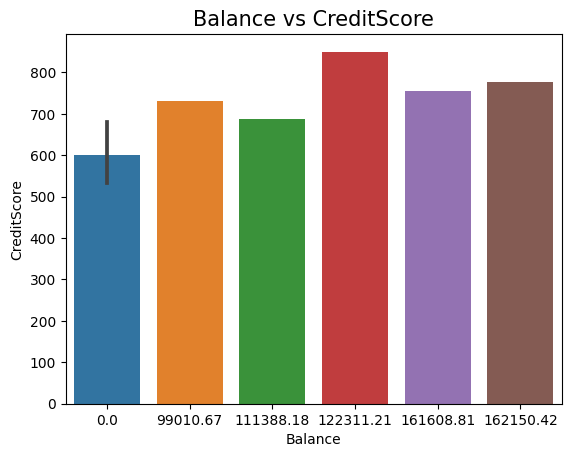

In [26]:
plt.style.use("default")
sns.barplot(x="Balance", y="CreditScore",data=data[179:190])
plt.title("Balance vs CreditScore",fontsize=15)
plt.xlabel("Balance")
plt.ylabel("CreditScore")
plt.show()

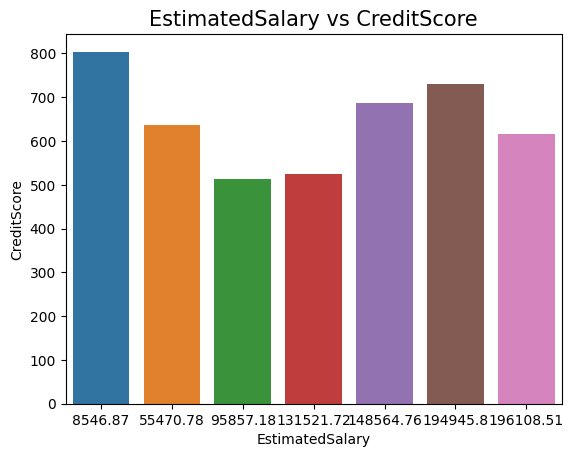

In [27]:
plt.style.use("default")
sns.barplot(x="EstimatedSalary", y="CreditScore",data=data[183:190])
plt.title("EstimatedSalary vs CreditScore",fontsize=15)
plt.xlabel("EstimatedSalary")
plt.ylabel("CreditScore")
plt.show()

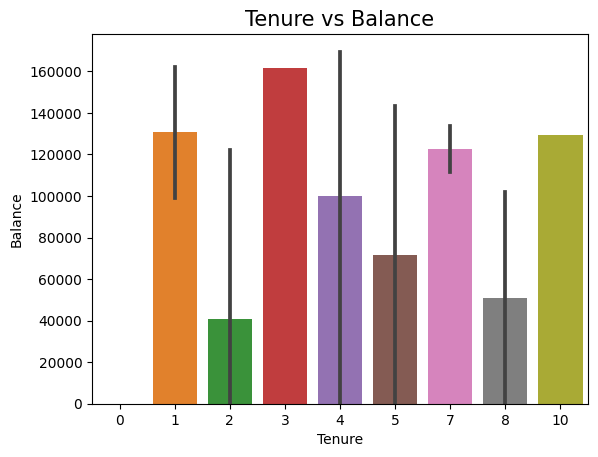

In [28]:
plt.style.use("default")
sns.barplot(x="Tenure", y="Balance",data=data[170:190])
plt.title("Tenure vs Balance",fontsize=15)
plt.xlabel("Tenure")
plt.ylabel("Balance")
plt.show()

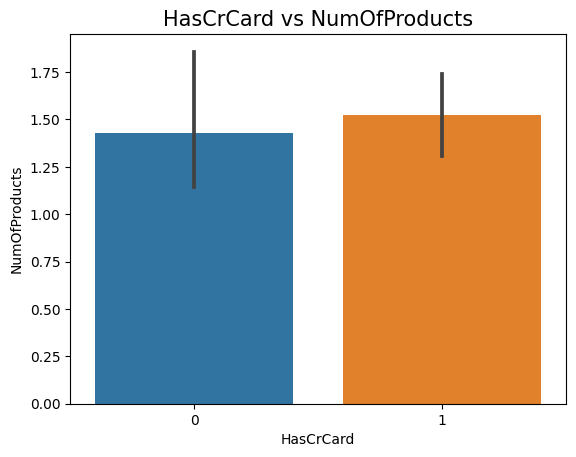

In [29]:
plt.style.use("default")
sns.barplot(x="HasCrCard", y="NumOfProducts",data=data[160:190])
plt.title("HasCrCard vs NumOfProducts",fontsize=15)
plt.xlabel("HasCrCard")
plt.ylabel("NumOfProducts")
plt.show()

In [30]:
# find the categorialfeatures
list_1=list(data.columns)

In [36]:
list_cate

['Surname', 'Geography', 'Gender']

In [31]:
list_cate=[]
for i in list_1:
    if data[i].dtype=='object':
        list_cate.append(i)

In [32]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [33]:
for i in list_cate:
    data[i]=le.fit_transform(data[i])

In [34]:
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,1115,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,1177,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,2040,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,289,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,1822,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,1999,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,1336,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,1570,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,2345,772,1,1,42,3,75075.31,2,1,0,92888.52,1
